In [1]:
from gensim.models import Word2Vec
import pandas as pd
import numpy as np

In [2]:
# Seed words for each feeling
feelings = {
    'Happiness': ['joy', 'delight', 'happy', 'cheerful', 'laughter', 'love', 'contentment', 'bliss', 'euphoria', 'excitement'],
    'Sadness': ['sadness', 'sorrow', 'grief', 'despair', 'melancholy', 'unhappiness', 'tears', 'loneliness', 'heartache', 'mournful'],
    'Anger': ['anger', 'rage', 'fury', 'wrath', 'irritation', 'frustration', 'resentment', 'hostility', 'indignation', 'annoyance'],
    'Fear': ['fear', 'anxiety', 'terror', 'fright', 'panic', 'worry', 'dread', 'apprehension', 'unease', 'phobia'],
    'Surprise': ['surprise', 'astonishment', 'amazement', 'wonder', 'shock', 'disbelief', 'awe', 'startle', 'unexpected', 'startled'],
    'Disgust': ['disgust', 'revulsion', 'repulsion', 'nausea', 'aversion', 'loathing', 'contempt', 'abhorrence', 'repugnance', 'detest'],
    'Trust': ['trust', 'confidence', 'faith', 'reliance', 'belief', 'assurance', 'loyalty', 'credibility', 'dependability', 'honesty'],
    'Anticipation': ['anticipation', 'expectation', 'excitement', 'eagerness', 'hope', 'optimism', 'suspense', 'foreboding', 'expectation', 'expectancy'],
    'Joy': ['joy', 'happiness', 'pleasure', 'delight', 'bliss', 'ecstasy', 'elation', 'jubilation', 'euphoria', 'exuberance'],
    'Love': ['love', 'affection', 'adoration', 'passion', 'romance', 'fondness', 'devotion', 'intimacy', 'warmth', 'tenderness']
}

In [3]:
from nltk.corpus import wordnet as wn

# Function to get synonyms for a given word
def get_synonyms(word):
    synonyms = set()
    for synset in wn.synsets(word):
        for lemma in synset.lemmas():
            synonyms.add(lemma.name())
    return synonyms

In [4]:
# Get synonyms for each feeling using WordNet
for feeling, seed_words in feelings.items():
    synonyms = set()
    for seed_word in seed_words:
        synonyms |= get_synonyms(seed_word)
    feelings[feeling] = list(synonyms)

# Print the seed words for each feeling
for feeling, seed_words in feelings.items():
    print(feeling + ": " + ", ".join(seed_words))

Happiness: passion, have_it_off, dearest, making_love, sleep_together, fervour, happy, ravish, well-chosen, laugh, revel, excitation, sexual_love, screw, love_life, turmoil, euphoria, enchant, excitement, joy, agitation, be_intimate, gladden, seventh_heaven, delight, jazz, transport, beloved, love, upheaval, have_sex, fuck, have_intercourse, have_a_go_at_it, bed, lie_with, euphory, glad, inflammation, make_out, sleep_with, enthrall, exhilaration, get_laid, please, walking_on_air, joyfulness, felicitous, joyousness, delectation, contentment, rejoice, erotic_love, have_it_away, bliss, pleasure, do_it, hump, upbeat, know, laughter, enjoy, eff, pollyannaish, bonk, make_love, honey, enrapture, cheerful, lovemaking, blissfulness, cloud_nine, bang, fervor, roll_in_the_hay, hullabaloo, dear, get_it_on, enthral
Sadness: lugubriousness, sombre, tears, pluck, solitariness, shoot, doleful, forlornness, snap, charge, rip, pull, desolation, melancholy, ruefulness, bout, tear, weeping, rupture, teard

# 1 Load the Corpus

In [155]:
import random
import pandas as pd
from sklearn import feature_extraction
from sklearn.cluster import KMeans 
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS

In [156]:
#Load the corpus
genre_name = "'English poetry -- 20th century'"

in_filepath = f"df_cleaned/{genre_name}/"
out_filepath = f'df_cleaned/{genre_name}/'
pickle_filepath = f'pickled/'

delimiter = "line"

filename = f"{delimiter}_merged_df.csv"

In [157]:
df = pd.read_csv(in_filepath+filename, index_col = 0)
df

,Poem Title,line
0,BY THE MACMILLAN COMPANY.,o ciel toute la chine est par terre en morceaux
1,BY THE MACMILLAN COMPANY.,ce vase pâle et doux comme un reflet des eaux
2,BY THE MACMILLAN COMPANY.,de ce vague idéal qui sort du bleu des songes
3,BY THE MACMILLAN COMPANY.,gardant sur lui le clair de lune en plein midi
4,BY THE MACMILLAN COMPANY.,qui semblait presque un monstre et semblait pr...
...,...,...
317,THE MACMILLAN COMPANY,it is his privilege to have made a contributio...
318,BY CONINGSBY WILLIAM DAWSON,the volume cannot be opened anywhere without y...
319,BY LANCE FALLAW,in the title of this book silverleaf stands fo...
320,POEMS BY WILLIAM J. NEIDIG,a volume of unusual quality of imagination and...


In [158]:
#Use association measures to find multi-word expressions in Gensim
phrase_model = Phrases([doc.split() for doc in df.loc[:,delimiter].values], 
                        min_count = 2, 
                        threshold = 0.7, 
                        connector_words = ENGLISH_CONNECTOR_WORDS, scoring = "npmi"
                        )

print(phrase_model.export_phrases().keys())
print("ABOVE: Learned phrases")

dict_keys(['semblait_presque', 'may_be', 'shot_silk', 'first_tale', 'these_things', 'has_been', 'could_understand', 'whole_world', 'weve_lost', 'weird_and_wicked', 'walk_into', 'beyond_the_sky', 'said_the_spider', 'parrots_beak', 'if_youd', 'showed_him', 'went_up', 'awayflower_from_the_spray', 'spray_colour', 'colour_and_light', 'soon_soon', 'soon_will', 'will_the_year', 'year_shed', 'shed_its', 'its_bloom', 'bloom_on_her', 'her_bier', 'gates_of_the_city', 'blind_man', 'dock_im', 'keep_eternal', 'eternal_time', 'born_in_bethlehem', 'kings_no', 'no_longer', 'wise_men', 'men_came', 'came_to_greet', 'greet_him', 'their_gifts', 'myrrh_and_frankincense', 'frankincense_they', 'they_brought', 'brought_to_make', 'know_the_way', 'way_to_win', 'childhoods_heart', 'shall_guide', 'through_the_glories'])
ABOVE: Learned phrases


In [159]:
#Replace phrases in the df
df.loc[:,delimiter] = [" ".join(phrase_model[sentence.split()]) for sentence in df.loc[:,delimiter]]

In [160]:
# #First find the most frequent words
# features = feature_extraction.text.CountVectorizer(input='content', 
#                                                 encoding='utf-8', 
#                                                 decode_error='ignore', 
#                                                 lowercase=True, 
#                                                 tokenizer = None,
#                                                 ngram_range=(1, 1), 
#                                                 analyzer='word', 
#                                                 max_features=500,   #Choose number of future stopwords
#                                                 )

In [161]:
import pandas as pd
from gensim.models import Word2Vec
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import string

# Function to preprocess text
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text.lower())
    # Remove punctuation
    tokens = [token for token in tokens if token not in string.punctuation]
    # Remove stopwords
    tokens = [token for token in tokens if token not in stopwords.words('english')]
    return tokens

In [162]:
# Iterate over each feeling and train Word2Vec model
word2vec_models = {}
for feeling, synonyms in feelings.items():
    for synonym in synonyms: 
        filtered_words = []
        for index, row in df.iterrows():
            tokens = preprocess_text(row[delimiter])
            filtered_words.extend([token for token in tokens if token in synonyms])

        # Check if there are filtered words associated with the feeling
        if filtered_words:
            # Train Word2Vec model on filtered words
            word2vec_model = Word2Vec(sentences=[filtered_words], vector_size=100, window=5, min_count=1, workers=4)
            word2vec_models[synonym] = word2vec_model
        else:
            print(f"No words associated with '{synonym}' found in the lines of poetry.")

No words associated with 'disrespect' found in the lines of poetry.
No words associated with 'execration' found in the lines of poetry.
No words associated with 'inconsistency' found in the lines of poetry.
No words associated with 'disdain' found in the lines of poetry.
No words associated with 'nausea' found in the lines of poetry.
No words associated with 'repulsion' found in the lines of poetry.
No words associated with 'loathing' found in the lines of poetry.
No words associated with 'churn_up' found in the lines of poetry.
No words associated with 'repulsive_force' found in the lines of poetry.
No words associated with 'antipathy' found in the lines of poetry.
No words associated with 'incompatibility' found in the lines of poetry.
No words associated with 'revolt' found in the lines of poetry.
No words associated with 'revulsion' found in the lines of poetry.
No words associated with 'mutual_exclusiveness' found in the lines of poetry.
No words associated with 'horror' found in 

In [163]:
# # Example: Get Word2Vec model for 'happiness'
# happiness_model = word2vec_models['passion']
# wv = model.wv['passion']
# print(word2vec_models.items())

In [164]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# Aggregate word vectors for each feeling
feeling_vectors = {}
for feeling, model in word2vec_models.items():
    try:
        word_vector = model.wv[feeling]
        feeling_vectors[feeling] = word_vector
    except:
        print(f"Not found for {feeling}")

print(feeling_vectors)

Not found for have_it_off
Not found for making_love
Not found for sleep_together
Not found for fervour
Not found for ravish
Not found for well-chosen
Not found for revel
Not found for excitation
Not found for sexual_love
Not found for screw
Not found for love_life
Not found for turmoil
Not found for euphoria
Not found for enchant
Not found for excitement
Not found for joy
Not found for agitation
Not found for be_intimate
Not found for gladden
Not found for seventh_heaven
Not found for delight
Not found for jazz
Not found for transport
Not found for beloved
Not found for upheaval
Not found for have_sex
Not found for fuck
Not found for have_intercourse
Not found for have_a_go_at_it
Not found for bed
Not found for lie_with
Not found for euphory
Not found for glad
Not found for inflammation
Not found for make_out
Not found for sleep_with
Not found for enthrall
Not found for exhilaration
Not found for get_laid
Not found for please
Not found for walking_on_air
Not found for joyfulness
Not fo

In [165]:
# Convert feeling vectors dict values to array
feeling_vectors_array = np.array(list(feeling_vectors.values()))
print(feeling_vectors_array.shape)

(26, 100)


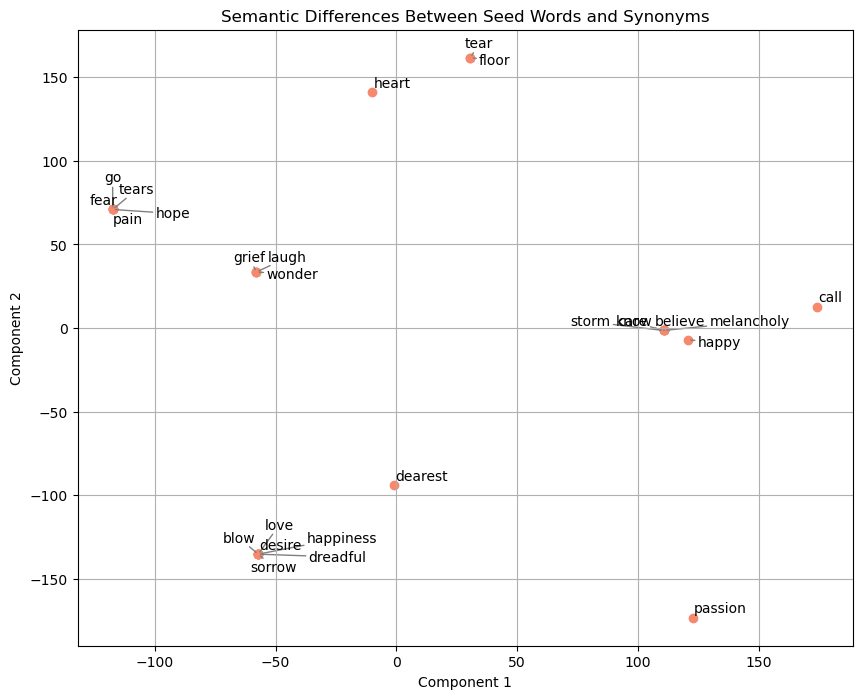

In [166]:
# !pip install adjustText
from adjustText import adjust_text

# Perform dimensionality reduction using t-SNE
tsne = TSNE(n_components=3, perplexity=2, random_state=42)
reduced_vectors = tsne.fit_transform(feeling_vectors_array)

# Plot the reduced vectors
plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], color=np.random.rand(3,))

# Add labels with adjust_text
texts = [plt.text(x, y, feeling) for x, y, feeling in zip(reduced_vectors[:, 0], reduced_vectors[:, 1], feeling_vectors.keys())]
adjust_text(texts, arrowprops=dict(arrowstyle='-', color='gray'))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('Semantic Differences Between Seed Words and Synonyms')
plt.grid(True)
plt.show()


In [167]:
import pickle

# Your word2vec_models dictionary
word2vec_models = word2vec_models  # Your dictionary here

# File path to save the pickle file
pickle_file_path = genre_name + "_word2vec_models.pickle"

# Pickle the dictionary
with open(pickle_file_path, "wb") as pickle_file:
    pickle.dump(word2vec_models, pickle_file)